In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn import datasets
import tensorflow as tf

import pydicom

from PIL import Image

from pydicom.data import get_testdata_file

import shutil

import cv2
import os

Ubicacion del path y listado de imagenes, el codigo se reutiliza para procesar aproximadamente 150 gb de informacion, de lo cual da como resultado 

In [4]:
PATH = 'C:/Users/anm23/OneDrive/Documentos/proyecto_ia/'
l_labels = os.listdir(PATH + 'rsna/imgs_por_vertebra_test')
len(l_labels)
#print(l_labels)

100

In [ ]:
l_labels[1]

'1.2.826.0.1.3680043.31083'

se cargan el dataset con las etiquetas para poder generar las clases

In [ ]:
labels = pd.read_csv(PATH+'/rsna/train.csv')
labels.shape

(2019, 9)

In [ ]:
labels.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
0,1.2.826.0.1.3680043.6200,1,1,1,0,0,0,0,0
1,1.2.826.0.1.3680043.27262,1,0,1,0,0,0,0,0
2,1.2.826.0.1.3680043.21561,1,0,1,0,0,0,0,0
3,1.2.826.0.1.3680043.12351,0,0,0,0,0,0,0,0
4,1.2.826.0.1.3680043.1363,1,0,0,0,0,1,0,0


In [ ]:
#l_labels = l_labels[:int(len(l_labels)*0.2)]

#l_labels = l_labels[:int(len(l_labels)*0.2)]

Cantidad de imagenes, el que se muestra en pantalla posee 655 pacientes, en el primer lote se procesaron al rededor de 500 pacientes

In [ ]:
len(l_labels)

100

Se ubica los indices de los pacientes existentes, para filtrar el dataset con la dat de los pacientes q se poseen.

In [ ]:
l = []
for i in l_labels:
  #print(i)
  item = labels.index[labels.StudyInstanceUID == i]
  #dicc = {'StudyInstanceUID': item.StudyInstanceUID, 'patient_overall': item.patient_overall, 
  #        'C1':item.C1, 'C2':item.C2, 'C3':item.C3, 'C4':item.C4, 'C5':item.C5}
  l.append(item.to_list()[0])
  
  #lb.append(dicc, ignore_index=True)
print(l)

[60, 1316, 959, 262, 1646, 1445, 713, 683, 62, 1416, 160, 77, 273, 1155, 1229, 1661, 756, 1640, 1169, 1025, 169, 733, 103, 148, 647, 1266, 1199, 895, 1649, 2013, 531, 229, 1522, 1217, 1297, 892, 792, 453, 1647, 587, 1830, 68, 929, 149, 90, 58, 860, 1956, 64, 1055, 671, 1256, 267, 1930, 839, 565, 1798, 1910, 817, 1037, 754, 1292, 1563, 2011, 1382, 1639, 1490, 726, 567, 1629, 235, 771, 1084, 1451, 1786, 1259, 1950, 632, 1811, 72, 1687, 1214, 1901, 1198, 227, 1386, 979, 1187, 1584, 919, 1663, 349, 1557, 1442, 870, 1175, 1013, 808, 1026, 1755]


In [ ]:
ubicacion_primer_paquete = [1167, 1137, 998, 144, 941, 1360, 801, 629, 1608, 1847, 1468, 712, 732, 519, 1234, 1293, 1999, 526, 1435, 641, 1515, 963, 783, 670, 4, 1370, 30, 292, 1788, 552, 1392, 938, 1899, 477, 1063, 863, 1764, 918, 744, 302, 202, 1593, 1585, 48, 833, 485, 1944, 1204, 807, 1152, 1654, 312, 333, 347, 916, 1367, 800, 1351, 406, 1046, 886, 285, 226, 1567, 554, 1686, 834, 1453, 1994, 545, 1795, 1821, 1334, 1265, 1268, 1627, 1829, 463, 1079, 1295, 1963, 133, 1150, 928, 256, 1781, 1978, 1277, 1419, 1513, 826, 217, 249, 232, 1742, 536, 1136, 1981, 956, 286, 200, 626, 431, 250, 1427, 296, 2005, 1776, 977, 165, 113, 1894, 445, 1939, 939, 597, 324, 203, 75, 524, 1076, 729, 269, 101, 460, 510, 1458, 1401, 197, 1751, 1710, 374, 1459, 1689, 1907, 1908, 391, 1920, 1783, 761, 1142, 1588, 451, 153, 490, 481, 468, 474, 1842, 1339, 1722, 415, 358, 1109, 1615, 1499, 1816, 1913, 421, 1509, 1125, 404, 734, 501, 1456, 1705, 1826, 682, 906, 1858, 1082, 1387, 1572, 642, 1534, 496, 1326, 832, 1915, 137, 427, 1991, 63, 1787, 735, 589, 1536, 487, 1653, 984, 1262, 423, 502, 1754, 845, 1732, 259, 2000, 1526, 177, 873, 1314, 1874, 1140, 513, 1045, 1554, 1696, 935, 595, 1258, 136, 614, 107, 141, 199, 1461, 824, 1191, 751, 1896, 937, 1590, 19, 432, 255, 542, 924, 608, 971, 1917, 780, 777, 188, 516, 268, 1768, 550, 237, 1143, 291, 660, 33, 82, 1616, 422, 67, 2003, 278, 1726, 1358, 25, 1598, 1612, 827, 1300, 547, 581, 511, 444, 1878, 207, 117, 1238, 1700, 194, 10, 1069, 1239, 618, 2015, 570, 1511, 847, 797, 5, 1319, 776, 1681, 585, 1662, 1890, 1730, 535, 1771, 1158, 1559, 828, 362, 1603, 594, 1180, 1350, 613, 465, 335, 492, 1634, 1264, 1831, 692, 401, 1066, 304, 727, 880, 1648, 1531, 1186, 1410, 1357, 1873, 387, 14, 1221, 999, 464, 28, 1313, 1704, 562, 1987, 1294, 1040, 747, 1462, 1525, 407, 746, 293, 1270, 1455, 1263, 1373, 87, 418, 81, 1130, 922, 877, 116, 1197, 512, 586, 46, 902, 1157, 405, 798, 758, 1080, 1574, 1620, 1724, 1396, 949, 129, 0, 1105, 898, 1685, 111, 850, 893, 1943, 1185, 598, 1206, 841, 1806, 88, 1028, 424, 167, 1060, 2012, 757, 1303, 1532, 1960, 1664, 955, 1215, 1937, 1103, 743, 1466, 1165, 1478, 876, 1384, 509, 1182, 1184, 543, 1888, 118, 718, 73, 279, 310, 1670, 32, 1508, 607, 1777, 884, 1924, 1767, 1803, 1100, 1093, 709, 840, 1737, 1207, 1050, 155, 1117, 1504, 39, 1658, 1376, 491, 1825, 411, 1202, 1308, 1545, 854, 441, 1338, 891, 1127, 164, 1501, 1903, 1507, 1974, 1562, 1327, 420, 1302, 108, 1397, 375, 557, 1141, 392, 690, 1070, 648, 193, 417, 1561, 1680, 1147, 211, 289, 894, 960, 1463, 329, 1728, 1947, 1409, 1473, 934, 318, 1480, 580, 707, 266, 1333, 867, 443, 1520, 957, 666, 54, 785, 654, 853, 1736, 24, 981, 992, 1236, 1001, 1019, 8, 1688, 253, 913, 181, 1946, 456, 1418]

Se filtra el dataset con iloc haciendo uso de los indeices.

In [ ]:
data = labels.iloc[l]

In [ ]:
print(data.shape)
print(len(l_labels))

(100, 9)
100


In [ ]:
data.shape

(75, 9)

In [ ]:
data.head()

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7
353,1.2.826.0.1.3680043.30020,1,0,0,0,0,1,0,0
896,1.2.826.0.1.3680043.30030,1,0,0,0,0,0,1,1
1162,1.2.826.0.1.3680043.30037,0,0,0,0,0,0,0,0
1905,1.2.826.0.1.3680043.30038,0,0,0,0,0,0,0,0
947,1.2.826.0.1.3680043.30039,1,0,0,0,0,0,0,1


In [ ]:
##Cuantos tipos de frctura tiene el paciente
types, counts = np.unique(data.patient_overall, return_counts=True)
print('tipos: ', types)
print('conteo: ', counts)

tipos:  [0 1]
conteo:  [93 82]


se reasignan los indices para mantener mayor orden.

In [ ]:
data = data.reset_index(drop=True)
data[data.StudyInstanceUID == '1.2.826.0.1.3680043.1010']

,StudyInstanceUID,patient_overall,C1,C2,C3,C4,C5,C6,C7


Se prueba el acceso a los datos de los archivos dicom. 

In [ ]:
#dicom_file = pydicom.read_file(PATH + '/rsna/train/1.2.826.0.1.3680043.1010')
n = os.listdir(PATH + '/rsna/train_images/1.2.826.0.1.3680043.10014')
print(len(n))
print(n)

258
['1.dcm', '10.dcm', '100.dcm', '101.dcm', '102.dcm', '103.dcm', '104.dcm', '105.dcm', '106.dcm', '107.dcm', '108.dcm', '109.dcm', '11.dcm', '110.dcm', '111.dcm', '112.dcm', '113.dcm', '114.dcm', '115.dcm', '116.dcm', '117.dcm', '118.dcm', '119.dcm', '12.dcm', '120.dcm', '121.dcm', '122.dcm', '123.dcm', '124.dcm', '125.dcm', '126.dcm', '127.dcm', '128.dcm', '129.dcm', '13.dcm', '130.dcm', '131.dcm', '132.dcm', '133.dcm', '134.dcm', '135.dcm', '136.dcm', '137.dcm', '138.dcm', '139.dcm', '14.dcm', '140.dcm', '141.dcm', '142.dcm', '143.dcm', '144.dcm', '145.dcm', '146.dcm', '147.dcm', '148.dcm', '149.dcm', '15.dcm', '150.dcm', '151.dcm', '152.dcm', '153.dcm', '154.dcm', '155.dcm', '156.dcm', '157.dcm', '158.dcm', '159.dcm', '16.dcm', '160.dcm', '161.dcm', '162.dcm', '163.dcm', '164.dcm', '165.dcm', '166.dcm', '167.dcm', '168.dcm', '169.dcm', '17.dcm', '170.dcm', '171.dcm', '172.dcm', '173.dcm', '174.dcm', '175.dcm', '176.dcm', '177.dcm', '178.dcm', '179.dcm', '18.dcm', '180.dcm', '181.

Se dividieron las imagenes en 7, ya que en la informacion dada por la organizacion que recopilo la informacion se indica que se poseen la tomografia completa de toda la espina cervical. por ello se dividen la cantidad de imagenes en 7.

In [ ]:
print('paciente: 1.2.826.0.1.3680043.10014' )
print('densidad tomografia: ', len(os.listdir(PATH + '/rsna/train_images/1.2.826.0.1.3680043.10014/')))
print('densidad de tomografias por vertebra: ', int(len(os.listdir(PATH + '/rsna/train_images/1.2.826.0.1.3680043.10014/'))/7))
print('img inicio vertebra rota: ', len(os.listdir(PATH + '/rsna/train_images/1.2.826.0.1.3680043.10014/'))-64)


paciente: 1.2.826.0.1.3680043.10014
densidad tomografia:  258
densidad de tomografias por vertebra:  36
img inicio vertebra rota:  194


In [ ]:
dicom = pydicom.dcmread(PATH + '/rsna/train_images/1.2.826.0.1.3680043.10014/1.dcm')

Datos que contiene los archivos dicom.

In [ ]:
print(dicom)

Dataset.file_meta -------------------------------
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.1010.1.1
(0002, 0010) Transfer Syntax UID                 UI: JPEG Lossless, Non-Hierarchical, First-Order Prediction (Process 14 [Selection Value 1])
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 2.3.0'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.1010.1.1
(0008, 0023) Content Date                        DA: '20220727'
(0008, 0033) Content Time                        TM: '185141.910658'
(0010, 0010) Patient's Name                      PN: '1010'
(0010, 0020) Patient ID                          LO: '1010'
(0018, 0050) Slice Thickness                     DS: '1.0'
(0020, 

## Carga de Datos

Para esto se recorre el directorio y se accede a las imagenes, probando el acceso a las misma para posteriormente generalizar la lectura y transformacion de los archivos.

In [ ]:
pyd = []
for i in n:
  ds = pydicom.dcmread(PATH + '/rsna/train_images/1.2.826.0.1.3680043.10014/' + i)
  ds.PhotometricInterpretation = 'YBR_FULL'
  pyd.append(ds)
  

In [ ]:
from pydicom import dcmread
import pylibjpeg

pixel_arrays = []
for i in pyd:
  img = i.pixel_array.astype(float)
  img_scaled = np.uint8((np.maximum(img, 0)/img.max())*255.0)
  #img_scaled = Image.fromarray(img_scaled)
  pixel_arrays.append(img_scaled)

In [ ]:
pixel_arrays[20].shape

(512, 512)

visualizando las imagenes contendias en los archivos dicom.

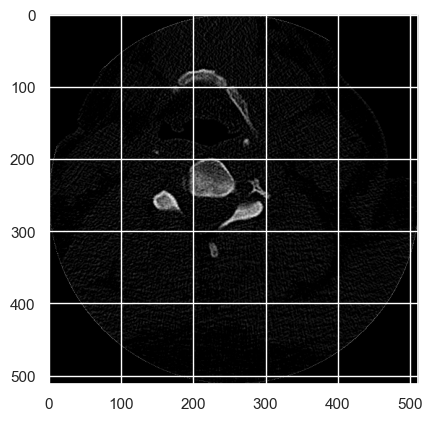

In [ ]:
img_convertida = cv2.cvtColor(pixel_arrays[20], cv2.COLOR_GRAY2RGB)
plt.imshow(img_convertida)

In [ ]:
img.shape

(512, 512)

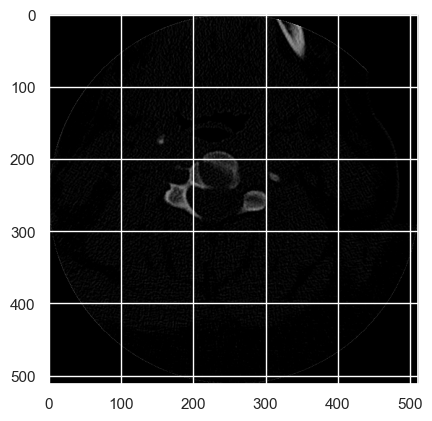

In [ ]:
#plt.subplot(2,2,1)
plt.imshow(pixel_arrays[3], cmap='gray')  # set the color map to bone
plt.show()

cantidad de imagenes por dimension, para normalizar la data

In [ ]:
cantidad = []
for i in l_labels:
  cantidad.append(len(os.listdir(PATH + 'rsna/train_images/' + i)))

In [ ]:
print(max(cantidad))
print(min(cantidad))
print(np.mean(cantidad))

765
139
347.9859437751004


In [ ]:
con = 0
for i in cantidad:
  if i < 200:
    con +=1

print(con)

31


Existen mayor cantidad de pacientes con un rango de imagenes de 200 a 300 imagenes, por lo que existe el riesgo de perder informacion.

<AxesSubplot: ylabel='Count'>

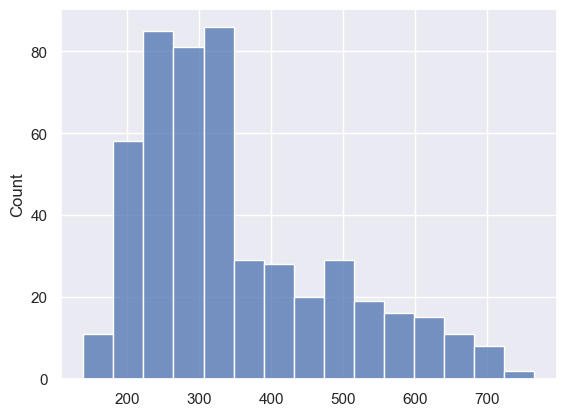

In [ ]:
sns.histplot(cantidad)

Se comprueba que todas las imagenes tengan las mismas dimensiones.

In [ ]:
dim = []
for i in pixel_arrays:
  dim.append(i.shape)

In [ ]:
print(max(dim))
print(min(dim))
print(np.mean(dim))

(512, 512)
(512, 512)
512.0


las imagenes se guardan en orden de 1 a la cantidad de imagenes, y puede generar algun tipo de error al recorrer las imagenes en las carpetas al momento de realizar la organizacion.

In [ ]:
## Comprueba que exista el mismo orden de nombre de las imagenes para guardar
## respecto a la vertebra respectiva

pacientes = l_labels
imgs_por_paciente = []
for p in pacientes:
  paciente = os.listdir(PATH + '/rsna/test_images/' + p)
  can_p = len(paciente)
  valor_max = 0
  for i in paciente:
    if (int(i[:-4])>valor_max):
      valor_max = int(i[:-4])
    
  if (can_p == valor_max):  
    #print({'cantidad-imgs: ':can_p, 'ultima-img: ':valor_max})
    imgs_por_paciente.append({'cantidad-imgs: ':can_p, 'ultima-img: ':valor_max})

  else:
    print('valores diferentes: ',{'cantidad-imgs: ':can_p, 'ultima-img: ':valor_max})
    print(p)

In [ ]:
p = '1.2.826.0.1.3680043.6959'
paciente = os.listdir(PATH + '/rsna/train_images/' + p)
#print(paciente)

['10.dcm', '100.dcm', '101.dcm', '102.dcm', '103.dcm', '104.dcm', '105.dcm', '106.dcm', '107.dcm', '108.dcm', '109.dcm', '11.dcm', '110.dcm', '111.dcm', '112.dcm', '113.dcm', '114.dcm', '115.dcm', '116.dcm', '117.dcm', '118.dcm', '119.dcm', '12.dcm', '120.dcm', '121.dcm', '122.dcm', '123.dcm', '124.dcm', '125.dcm', '126.dcm', '127.dcm', '128.dcm', '129.dcm', '13.dcm', '130.dcm', '131.dcm', '132.dcm', '133.dcm', '134.dcm', '135.dcm', '136.dcm', '137.dcm', '138.dcm', '139.dcm', '14.dcm', '140.dcm', '141.dcm', '142.dcm', '143.dcm', '144.dcm', '145.dcm', '146.dcm', '147.dcm', '148.dcm', '149.dcm', '15.dcm', '150.dcm', '151.dcm', '152.dcm', '153.dcm', '154.dcm', '155.dcm', '156.dcm', '157.dcm', '158.dcm', '159.dcm', '16.dcm', '160.dcm', '161.dcm', '162.dcm', '163.dcm', '164.dcm', '165.dcm', '166.dcm', '167.dcm', '168.dcm', '169.dcm', '17.dcm', '170.dcm', '171.dcm', '172.dcm', '173.dcm', '174.dcm', '175.dcm', '176.dcm', '177.dcm', '178.dcm', '179.dcm', '18.dcm', '180.dcm', '181.dcm', '182.dc

En esta parte se almacenan las imagenes por paciente en la carpeta respectiva a la vertebra a la que pertence la imagen, esto en base al numero de imagen y la cantidad de imagenes, por esto mismo se revisa que el nombre de la imagen coincida con la cantidad de imagenes, es decir si tiene 300 imagenes se espera que el ultimo archivo dicom se llame 300.dcm.

In [ ]:
###no borrar, transforma los .dcm en jpg blanco y negro

pacientes = l_labels
pyd = []
for p in pacientes:
  paciente = sorted(os.listdir(PATH + '/rsna/test_images/' + p))
  print('paciente: ', p)
  print('len list: ' + str(len(paciente)))

  #Creacion de carpetas por pacietne y sus vertebras
  os.mkdir(PATH + 'rsna/imgs_por_vertebra_test/' + p)

  os.mkdir(PATH + 'rsna/imgs_por_vertebra_test/' + p + '/c1')
  os.mkdir(PATH + 'rsna/imgs_por_vertebra_test/' + p + '/c2')
  os.mkdir(PATH + 'rsna/imgs_por_vertebra_test/' + p + '/c3')
  os.mkdir(PATH + 'rsna/imgs_por_vertebra_test/' + p + '/c4')
  os.mkdir(PATH + 'rsna/imgs_por_vertebra_test/' + p + '/c5')
  os.mkdir(PATH + 'rsna/imgs_por_vertebra_test/' + p + '/c6')
  os.mkdir(PATH + 'rsna/imgs_por_vertebra_test/' + p + '/c7')

  tamaño_vertebra = int(len(os.listdir(PATH + '/rsna/test_images/' + p))/7)
  print('cantidad de imgs por vertebra: ', tamaño_vertebra)

  
  
  ##Calcula el # maximo de la vertebra
  valor_max = 0
  for i in paciente:
    if (int(i[:-4])>valor_max):
      valor_max = int(i[:-4])
  
  v_sum = abs(len(paciente)-valor_max)

  print({'cantidad-imgs: ':len(paciente), 'ultima-img: ':valor_max, 'diferencia: ':v_sum})



  for i in paciente:
    #Transformacion de la imagen
    img = pydicom.dcmread(PATH + 'rsna/test_images/' + p + '/' + i).pixel_array
    img_scaled = np.uint8((np.maximum(img, 0)/img.max())*255.0)

    #Se guarda la imagen segun su ubicacion en vertebra
    num_img = int(i[:-4]) - v_sum

    if (num_img <= tamaño_vertebra):
      cv2.imwrite(PATH + 'rsna/imgs_por_vertebra_test/'+ p + '/C1/' + i[:-4] +'.jpg' , img_scaled)

    if (tamaño_vertebra < num_img <= (tamaño_vertebra*2)):
      cv2.imwrite(PATH + 'rsna/imgs_por_vertebra_test/'+ p + '/C2/' + i[:-4] +'.jpg' , img_scaled)

    if (tamaño_vertebra*2 < num_img <= tamaño_vertebra*3):
      cv2.imwrite(PATH + 'rsna/imgs_por_vertebra_test/'+ p + '/C3/' + i[:-4] +'.jpg' , img_scaled)

    if (tamaño_vertebra*3 < num_img <= tamaño_vertebra*4):
      cv2.imwrite(PATH + 'rsna/imgs_por_vertebra_test/'+ p + '/C4/' + i[:-4] +'.jpg' , img_scaled)

    if (tamaño_vertebra*4 < num_img <= tamaño_vertebra*5):
      cv2.imwrite(PATH + 'rsna/imgs_por_vertebra_test/'+ p + '/C5/' + i[:-4] +'.jpg' , img_scaled)
    
    if (tamaño_vertebra*5 < num_img <= tamaño_vertebra*6):
      cv2.imwrite(PATH + 'rsna/imgs_por_vertebra_test/'+ p + '/C6/' + i[:-4] +'.jpg' , img_scaled)
    
    if (tamaño_vertebra*6 < num_img):
      cv2.imwrite(PATH + 'rsna/imgs_por_vertebra_test/'+ p + '/C7/' + i[:-4] +'.jpg' , img_scaled)
    
  print(p)
  path = PATH + 'rsna/imgs_por_vertebra_test/'+ p + '/'
  s = (len(os.listdir(path+'C1'))+len(os.listdir(path+'C2'))+len(os.listdir(path+'C3'))+
      len(os.listdir(path+'C4'))+len(os.listdir(path+'C5'))+len(os.listdir(path+'C6'))+len(os.listdir(path+'C7')))
  print('len dir: ', s)
  
  #if (len(paciente) != len(os.listdir(PATH + 'rsna/imgs/' + p))):
  #  break

paciente:  1.2.826.0.1.3680043.30020
len list: 613
cantidad de imgs por vertebra:  87
{'cantidad-imgs: ': 613, 'ultima-img: ': 613, 'diferencia: ': 0}
1.2.826.0.1.3680043.30020
len dir:  613
paciente:  1.2.826.0.1.3680043.30030
len list: 314
cantidad de imgs por vertebra:  44
{'cantidad-imgs: ': 314, 'ultima-img: ': 314, 'diferencia: ': 0}
1.2.826.0.1.3680043.30030
len dir:  314
paciente:  1.2.826.0.1.3680043.30037
len list: 334
cantidad de imgs por vertebra:  47
{'cantidad-imgs: ': 334, 'ultima-img: ': 334, 'diferencia: ': 0}
1.2.826.0.1.3680043.30037
len dir:  334
paciente:  1.2.826.0.1.3680043.30038
len list: 713
cantidad de imgs por vertebra:  101
{'cantidad-imgs: ': 713, 'ultima-img: ': 713, 'diferencia: ': 0}
1.2.826.0.1.3680043.30038
len dir:  713
paciente:  1.2.826.0.1.3680043.30039
len list: 578
cantidad de imgs por vertebra:  82
{'cantidad-imgs: ': 578, 'ultima-img: ': 578, 'diferencia: ': 0}
1.2.826.0.1.3680043.30039
len dir:  578
paciente:  1.2.826.0.1.3680043.30051
len lis

Se crean las carpetas para la clasificacion de imagenes por vertebras, ya que al poseer tantas imagenes se deben cargar desde el disco duro, debido a que se usara la libreria tf.keras.preprocessing.image_dataset_from_directory se debe guardar las imagenes por clase, para esto se define que existen 14 clases donde 7 hacen referencia a la vertebra sin fractura, las carpetas terminadas en 0, y otras 7 carpetas que hacen referencia a las 7 vertebras con fractura.

In [ ]:
#os.mkdir(PATH + 'rsna/imgs_vertebra_estado/' + p)

os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C11')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C10')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C21')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C20')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C31')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C30')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C41')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C40')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C51')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C50')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C61')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C60')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C71')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_test/C70')

Posteriormente se copian las imagenes por paciente a su respectiva carpeta de clase, con un nombre que indica que paciente y numero de imagen posee, para esto se define, asignar en las clases con ruptura de vertebra solo las imagenes de cuyo paciente poseia fractura en el rango especifico, posterior a esto se asignan de forma semejante en las clases sin fractura las imagenes de las vertebras cuyo paciente no tuvo ruptura en alguna vertebra, por esto mismo se espera obtener mas imagenes en las clases sin fractura cervical, por lo que posteriormente se realizara una normalizacion para que tanto las clases con fractura y sin fractura posean numero similares de imagenes, esto con el objetivo de no sesgar el aprendizaje.

In [ ]:
#shutil.copy("archivo.txt", "Documentos/archivo.txt")
#data = labels.iloc[l]
print(data.shape[0])

vertebras = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

for i in range(0, data.shape[0]):
  print(data['StudyInstanceUID'].iloc[i])
  for vertebra in vertebras:
    p = data['StudyInstanceUID'].iloc[i]

    if ((data[vertebra].iloc[i] == 1) & (data['patient_overall'].iloc[i] == 1)):
      for img in os.listdir(PATH + 'rsna/imgs_por_vertebra_test/' + p + '/' + vertebra):
        f = PATH + 'rsna/imgs_por_vertebra_test/' + p + '/' + vertebra + '/' + img
        to = PATH + 'rsna/imgs_vertebra_estado_test/' + vertebra + '1' + '/'+ p + '.' + img
        shutil.copy(f, to)

    if ( data['patient_overall'].iloc[i] == 0 ):
      for img in os.listdir(PATH + 'rsna/imgs_por_vertebra_test/' + p + '/' + vertebra):
        f = PATH + 'rsna/imgs_por_vertebra_test/' + p + '/' + vertebra + '/' + img
        to = PATH + 'rsna/imgs_vertebra_estado_test/' + vertebra + '0' + '/'+ p + '.' + img
        shutil.copy(f, to)


Se cuenta la cantidad de imagenes por clase:

In [5]:
#vertebras = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']

counts = []
counts_sin = 0

vertebras = os.listdir(PATH + 'rsna/imgs_vertebra_estado/')
print(vertebras)

for vertebra in vertebras:
  cant_img = len(os.listdir(PATH + 'rsna/imgs_vertebra_estado/' + vertebra))
  counts.append(cant_img)
  print('La vertebra ',vertebra, ' tiene ', cant_img, ' imagenes sin ruptura.')

print('total tomografias con fractura: ', np.sum(counts))


['C10', 'C11', 'C20', 'C21', 'C30', 'C31', 'C40', 'C41', 'C50', 'C51', 'C60', 'C61', 'C70', 'C71']
La vertebra  C10  tiene  13877  imagenes sin ruptura.
La vertebra  C11  tiene  3629  imagenes sin ruptura.
La vertebra  C20  tiene  13877  imagenes sin ruptura.
La vertebra  C21  tiene  6365  imagenes sin ruptura.
La vertebra  C30  tiene  13877  imagenes sin ruptura.
La vertebra  C31  tiene  1985  imagenes sin ruptura.
La vertebra  C40  tiene  13877  imagenes sin ruptura.
La vertebra  C41  tiene  3188  imagenes sin ruptura.
La vertebra  C50  tiene  13877  imagenes sin ruptura.
La vertebra  C51  tiene  4420  imagenes sin ruptura.
La vertebra  C60  tiene  13877  imagenes sin ruptura.
La vertebra  C61  tiene  7385  imagenes sin ruptura.
La vertebra  C70  tiene  14626  imagenes sin ruptura.
La vertebra  C71  tiene  10047  imagenes sin ruptura.
total tomografias con fractura:  134907


In [ ]:
#os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C11')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C10')
#os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C21')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C20')
#os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C31')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C30')
#os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C41')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C40')
#os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C51')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C50')
#os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C61')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C60')
#os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C71')
os.mkdir(PATH + 'rsna/imgs_vertebra_estado_norm/C70')

Para la normalizacion se extraen de las carpetas sin fractura 4900 imagenes de forma aleatorea, y se copian las clases con fractura en su totalidad.

In [ ]:
import random
vertebras = os.listdir(PATH + 'rsna/imgs_vertebra_estado/')
print(vertebras)
num_vert = 0
for vertebra in vertebras:
  num_vert += 1
  #cant_img = len(os.listdir(PATH + 'rsna/imgs_vertebra_estado/' + vertebra))
  #counts.append(cant_img)
  #print('La vertebra ',vertebra, ' tiene ', cant_img, ' imagenes sin ruptura.')

  
  
  if( num_vert % 2 == 1):
    print('carpeta: ',vertebra)
    p = os.listdir(PATH + 'rsna/imgs_vertebra_estado/' + vertebra)
    l = []
    con = 0
    while (con < 5532):
      e = random.choice(p)
      if (e not in l):
        l.append(e)
        con += 1
    print('termino de escoger imagenes')
    for img in l:
      f = PATH + 'rsna/imgs_vertebra_estado/' + vertebra + '/' + img
      to = PATH + 'rsna/imgs_vertebra_estado_norm/' + vertebra  + '/' + img
      print('f: ', f)
      print('to: ', to)
      shutil.copy(f, to) 


#print('total tomografias con fractura: ', np.sum(counts))



Se han truncado las últimas 5000 líneas del flujo de salida.
f:  C:/Users/anm23/OneDrive/Documentos/proyecto_ia/rsna/imgs_vertebra_estado/C70/1.2.826.0.1.3680043.2668.506.jpg
to:  C:/Users/anm23/OneDrive/Documentos/proyecto_ia/rsna/imgs_vertebra_estado_norm/C70/1.2.826.0.1.3680043.2668.506.jpg
f:  C:/Users/anm23/OneDrive/Documentos/proyecto_ia/rsna/imgs_vertebra_estado/C70/1.2.826.0.1.3680043.5812.306.jpg
to:  C:/Users/anm23/OneDrive/Documentos/proyecto_ia/rsna/imgs_vertebra_estado_norm/C70/1.2.826.0.1.3680043.5812.306.jpg
f:  C:/Users/anm23/OneDrive/Documentos/proyecto_ia/rsna/imgs_vertebra_estado/C70/1.2.826.0.1.3680043.6078.238.jpg
to:  C:/Users/anm23/OneDrive/Documentos/proyecto_ia/rsna/imgs_vertebra_estado_norm/C70/1.2.826.0.1.3680043.6078.238.jpg
f:  C:/Users/anm23/OneDrive/Documentos/proyecto_ia/rsna/imgs_vertebra_estado/C70/1.2.826.0.1.3680043.6245.275.jpg
to:  C:/Users/anm23/OneDrive/Documentos/proyecto_ia/rsna/imgs_vertebra_estado_norm/C70/1.2.826.0.1.3680043.6245.275.jpg
f: 

De esta forma se obtiene que las cantidades de imagenes con fractura y sin fractura son cercanas:

In [ ]:
counts_con = []
counts_sin = []

vertebras = os.listdir(PATH + 'rsna/imgs_vertebra_estado_norm/')
print(vertebras)
con = 0
for vertebra in vertebras:
  con = con +1
  cant_img = len(os.listdir(PATH + 'rsna/imgs_vertebra_estado_norm/' + vertebra))
  if(con%2 == 0):
    counts_con.append(cant_img)
  else:
    counts_sin.append(cant_img)

  
  counts.append(cant_img)
  print('La vertebra ',vertebra, ' tiene ', cant_img, ' imagenes sin ruptura.')

print('total tomografias con fractura: ', np.sum(counts_con))
print('total tomografias sin fractura: ', np.sum(counts_sin))

['C10', 'C11', 'C20', 'C21', 'C30', 'C31', 'C40', 'C41', 'C50', 'C51', 'C60', 'C61', 'C70', 'C71']
La vertebra  C10  tiene  5532  imagenes sin ruptura.
La vertebra  C11  tiene  3966  imagenes sin ruptura.
La vertebra  C20  tiene  5532  imagenes sin ruptura.
La vertebra  C21  tiene  6599  imagenes sin ruptura.
La vertebra  C30  tiene  5532  imagenes sin ruptura.
La vertebra  C31  tiene  2147  imagenes sin ruptura.
La vertebra  C40  tiene  5532  imagenes sin ruptura.
La vertebra  C41  tiene  3360  imagenes sin ruptura.
La vertebra  C50  tiene  5532  imagenes sin ruptura.
La vertebra  C51  tiene  4740  imagenes sin ruptura.
La vertebra  C60  tiene  5532  imagenes sin ruptura.
La vertebra  C61  tiene  7871  imagenes sin ruptura.
La vertebra  C70  tiene  5532  imagenes sin ruptura.
La vertebra  C71  tiene  10047  imagenes sin ruptura.
total tomografias con fractura:  38730
total tomografias sin fractura:  38724


In [ ]:
38730/7

5532.857142857143

In [ ]:
print('Imagenes sin fractura: ',5200*7)
print('Imagenes con fractura: ',75130-5200*7)

Imagenes sin fractura:  36400
Imagenes con fractura:  38730
